<a href="https://colab.research.google.com/github/AnastasiyaKrokhina/DataCon-time-1/blob/main/notebooks/CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from google.colab import drive
import os


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://github.com/AnastasiyaKrokhina/DataCon-time-1/blob/main/data/final.csv?raw=true'
df = pd.read_csv(url, delimiter = ',', index_col=0)

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.0 MB/s 


In [ ]:
df

,Surface charge (mV),Density (g/cm3),charge density,Type,Coat,Diameter (nm),cell_line,Viability (%),Hydro size (nm),Aspect_Ratio,Ionic radius,Core size (nm),Surface area (m2/g),Topological polar surface area (Å²),average electronegativity,electron_affinity,dose_time,if_oxide
0,0.106852,-0.010261,-0.093064,1.0,0.0,0.019778,0.0,0.536858,0.141734,0.010124,0.007580,0.377779,0.125463,0.328442,0.81250,0.426598,1.970944e-09,1.0
1,0.106852,-0.010261,-0.093064,1.0,0.0,0.019778,0.0,0.523827,0.141734,0.010124,0.007580,0.377779,0.125463,0.328442,0.81250,0.426598,4.032869e-09,1.0
2,0.106852,-0.010261,-0.093064,1.0,0.0,0.019778,0.0,0.533137,0.141734,0.010124,0.007580,0.377779,0.125463,0.328442,0.81250,0.426598,8.065783e-09,1.0
3,0.106852,-0.010261,-0.093064,1.0,0.0,0.019778,0.0,0.508932,0.141734,0.010124,0.007580,0.377779,0.125463,0.328442,0.81250,0.426598,1.613161e-08,1.0
4,0.106852,-0.010261,-0.093064,1.0,0.0,0.019778,0.0,0.495894,0.141734,0.010124,0.007580,0.377779,0.125463,0.328442,0.81250,0.426598,6.258963e-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,-1.556342,0.668444,-2.076602,1.0,1.0,0.086234,1.0,0.647937,0.128033,0.010124,0.005637,0.315622,0.033017,0.000000,0.72476,0.033018,2.000000e-05,1.0
7434,-1.556342,0.668444,-2.076602,1.0,1.0,0.086234,1.0,0.591698,0.128033,0.010124,0.005637,0.315622,0.033017,0.000000,0.72476,0.033018,2.000000e-04,1.0
7435,-1.556342,0.668444,-2.076602,1.0,1.0,0.086234,1.0,0.207848,0.128033,0.010124,0.005637,0.315622,0.033017,0.000000,0.72476,0.033018,2.000000e-03,1.0
7436,-1.556342,0.668444,-2.076602,1.0,1.0,0.086234,1.0,0.441614,0.128033,0.010124,0.005637,0.315622,0.033017,0.000000,0.72476,0.033018,1.000000e-06,1.0


In [ ]:
X = df.drop('Viability (%)', axis=1, inplace=False)
y = df['Viability (%)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV 
model = CatBoostRegressor()
param_grid = {'iterations': [150, 200],
        'learning_rate': [0.05, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
clf = GridSearchCV(model, param_grid, cv=10)
clf.fit(X_train, y_train) 

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 68.3483874	total: 5.63ms	remaining: 1.12s
1:	learn: 64.7608578	total: 11.1ms	remaining: 1.09s
2:	learn: 61.2789216	total: 16.3ms	remaining: 1.07s
3:	learn: 57.8157727	total: 21.6ms	remaining: 1.06s
4:	learn: 54.6513719	total: 27ms	remaining: 1.05s
5:	learn: 51.3058461	total: 33.6ms	remaining: 1.09s
6:	learn: 48.6134454	total: 40.2ms	remaining: 1.11s
7:	learn: 45.9032862	total: 45.8ms	remaining: 1.1s
8:	learn: 43.4263712	total: 51.4ms	remaining: 1.09s
9:	learn: 41.0355680	total: 57.1ms	remaining: 1.08s
10:	learn: 38.7895906	total: 62.7ms	remaining: 1.08s
11:	learn: 36.4539551	total: 68.3ms	remaining: 1.07s
12:	learn: 34.3989284	total: 73.7ms	remaining: 1.06s
13:	learn: 32.4604533	total: 79.4ms	remaining: 1.05s
14:	learn: 30.6313102	total: 85.3ms	remaining: 1.05s
15:	learn: 29.1698524	total: 91.4ms	remaining: 1.05s
16:	learn: 27.2682163	total: 96.9ms	remaining: 1.04s
17:	learn: 25.7885359	total: 103ms	remaining

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f182412e450>,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.05, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9684194183906559

 The best parameters across ALL searched params:
 {'depth': 2, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [ ]:
model = CatBoostRegressor(iterations=200,
                        learning_rate=0.1,
                        depth=2,
                        l2_leaf_reg=3)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10)
scores

0:	learn: 0.1508156	total: 6.5ms	remaining: 1.29s
1:	learn: 0.1492124	total: 7.75ms	remaining: 767ms
2:	learn: 0.1474385	total: 9ms	remaining: 591ms
3:	learn: 0.1460717	total: 10ms	remaining: 492ms
4:	learn: 0.1445369	total: 11.2ms	remaining: 437ms
5:	learn: 0.1433242	total: 18.8ms	remaining: 606ms
6:	learn: 0.1419522	total: 20ms	remaining: 551ms
7:	learn: 0.1411565	total: 21.1ms	remaining: 507ms
8:	learn: 0.1399049	total: 23.1ms	remaining: 490ms
9:	learn: 0.1389130	total: 28.6ms	remaining: 543ms
10:	learn: 0.1380665	total: 29.7ms	remaining: 511ms
11:	learn: 0.1372638	total: 30.8ms	remaining: 483ms
12:	learn: 0.1362606	total: 38.7ms	remaining: 556ms
13:	learn: 0.1357791	total: 46.5ms	remaining: 618ms
14:	learn: 0.1351413	total: 47.9ms	remaining: 591ms
15:	learn: 0.1343739	total: 55.2ms	remaining: 635ms
16:	learn: 0.1335604	total: 56.5ms	remaining: 608ms
17:	learn: 0.1331521	total: 57.6ms	remaining: 582ms
18:	learn: 0.1325708	total: 58.8ms	remaining: 560ms
19:	learn: 0.1322569	total: 66

array([-0.05173528,  0.15523466,  0.13605916,  0.15955858,  0.11853836,
        0.3159059 ,  0.31454039,  0.25688574,  0.48848188,  0.49038605])

In [ ]:
model.fit(X_train, y_train)

0:	learn: 0.1535344	total: 2.74ms	remaining: 546ms
1:	learn: 0.1517965	total: 6.32ms	remaining: 626ms
2:	learn: 0.1503568	total: 9.83ms	remaining: 645ms
3:	learn: 0.1492716	total: 15.3ms	remaining: 751ms
4:	learn: 0.1481690	total: 18.7ms	remaining: 729ms
5:	learn: 0.1471021	total: 23.3ms	remaining: 754ms
6:	learn: 0.1460730	total: 29.8ms	remaining: 821ms
7:	learn: 0.1447507	total: 32.1ms	remaining: 769ms
8:	learn: 0.1436558	total: 35.1ms	remaining: 745ms
9:	learn: 0.1428939	total: 36.6ms	remaining: 695ms
10:	learn: 0.1422146	total: 38.1ms	remaining: 654ms
11:	learn: 0.1416406	total: 39.5ms	remaining: 619ms
12:	learn: 0.1410969	total: 41.4ms	remaining: 596ms
13:	learn: 0.1402158	total: 42.7ms	remaining: 567ms
14:	learn: 0.1393870	total: 44.1ms	remaining: 543ms
15:	learn: 0.1386267	total: 45.5ms	remaining: 523ms
16:	learn: 0.1382504	total: 47ms	remaining: 506ms
17:	learn: 0.1375395	total: 48.5ms	remaining: 491ms
18:	learn: 0.1370093	total: 49.9ms	remaining: 475ms
19:	learn: 0.1367255	tot

In [ ]:
scor = model.score(X_test, y_test)
print(f'Score for Catboost Regressor: {scor}')

Score for Catboost Regressor: 0.4100604714251588


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
predicted = model.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt

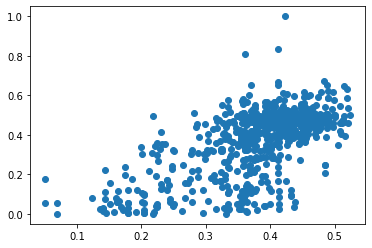

In [ ]:
plt.scatter(predicted, y_test)
plt.show()

**Feature importance**

In [ ]:
from catboost import Pool

In [ ]:
model.get_feature_importance(Pool(X_train, y_train))

array([1.21150917e+01, 7.10877181e-01, 6.69535655e+00, 7.29434589e-02,
       3.23061052e-01, 4.26093492e+00, 0.00000000e+00, 3.07792072e+00,
       3.51623698e+00, 1.59749864e+00, 5.61901869e-01, 1.52881684e-02,
       5.13594366e+00, 1.61541769e+01, 1.52857468e+01, 3.02408665e+01,
       2.36154986e-01])

**dose_time, average electronegativity, electron_affinity, Surface charge (mV)-наиболее важные дескрипторы, причем нами предложены dose_time, electron_affinity**

<BarContainer object of 17 artists>

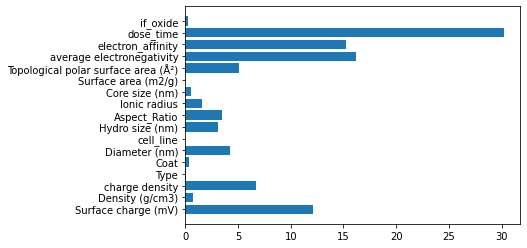

In [ ]:
plt.barh(X.columns, model.feature_importances_)

In [ ]:
model = CatBoostRegressor(iterations=1000,
                        learning_rate=0.9,
                        depth=3,
                        l2_leaf_reg=3, random_seed=10)

In [ ]:
model.fit(X_train, y_train)

0:	learn: 0.1372278	total: 1.64ms	remaining: 1.64s
1:	learn: 0.1312974	total: 3.96ms	remaining: 1.98s
2:	learn: 0.1295036	total: 5.46ms	remaining: 1.81s
3:	learn: 0.1277455	total: 7.14ms	remaining: 1.78s
4:	learn: 0.1266794	total: 8.77ms	remaining: 1.74s
5:	learn: 0.1251994	total: 10.3ms	remaining: 1.71s
6:	learn: 0.1241724	total: 12ms	remaining: 1.7s
7:	learn: 0.1234087	total: 13.7ms	remaining: 1.7s
8:	learn: 0.1228676	total: 15.3ms	remaining: 1.69s
9:	learn: 0.1218254	total: 17ms	remaining: 1.69s
10:	learn: 0.1214641	total: 20ms	remaining: 1.8s
11:	learn: 0.1208814	total: 22.2ms	remaining: 1.83s
12:	learn: 0.1197807	total: 26.1ms	remaining: 1.99s
13:	learn: 0.1188006	total: 28.5ms	remaining: 2s
14:	learn: 0.1182308	total: 30.6ms	remaining: 2.01s
15:	learn: 0.1171939	total: 33.6ms	remaining: 2.07s
16:	learn: 0.1161819	total: 36ms	remaining: 2.08s
17:	learn: 0.1158069	total: 37.7ms	remaining: 2.06s
18:	learn: 0.1149972	total: 39.4ms	remaining: 2.03s
19:	learn: 0.1143560	total: 40.9ms	r

In [ ]:
scor = model.score(X_test, y_test)
print(f'Score for Catboost Regressor: {scor}')

Score for Catboost Regressor: 0.6371806677512996


<BarContainer object of 17 artists>

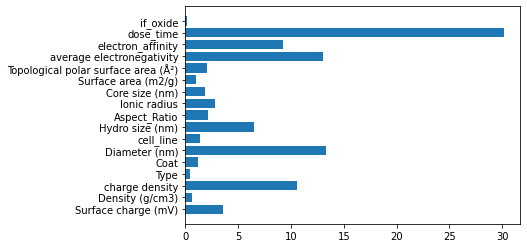

In [ ]:
plt.barh(X.columns, model.feature_importances_)

In [ ]:
predicted = model.predict(X_test)

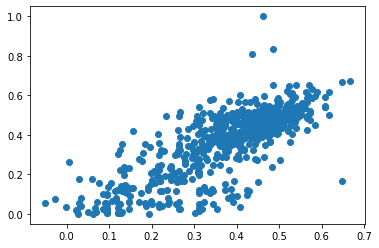

In [ ]:
plt.scatter(predicted, y_test)
plt.show()